In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats

## Monotone Functions ##

The method we have developed for finding the density of a linear function of a random variable can be extended to non-linear functions. We will start with a setting in which you have seen that applying non-linear functions to a random variable can have useful results.

### Simulation via the CDF ###
In exercises, you have seen by simulation that you can generate a value of a random variable with a specified distribution by using the cdf of the distribution and a uniform (0, 1) random number. We will now establish the theory that underlies what you discovered by computation. 

Let $F$ be a differentiable, strictly increasing cdf on the real number line. The differentiability assumption allows you to find the corresponding density by differentiating. 

Our goal is to generate a value of a random variable that has $F$ as its cdf. The statement below describes the process that you came up with in exercises. Note that because $F$ is continuous and strictly increasing, it has an inverse function.

Let $U$ have the uniform (0, 1) distribution. Define a random variable $X$ by the formula $X = F^{-1}(U)$, and let $F_X$ be the cdf of $X$. We will show that $F_X = F$ and thus that $X$ has the desired distribution.

To prove the result, remember that the cdf $F_U$ of $U$ is given by $F_U(u) = u$ for $0 < u < 1$. Let $x$ be any number. Our goal is to show that $F_X(x) = F(x)$.

$$
\begin{align*}
F_X(x) ~ &= ~ P(X \le x) \\
&= ~ P(F^{-1}(U) \le x) \\
&= ~ P(U \le F(x)) ~~~~ \mbox{because } F \mbox{ is increasing} \\
&= ~ F_U(F(x)) \\
&= ~ F(x)
\end{align*}
$$

### Change of Variable Formula for Density: Increasing Function ###
The function $F^{-1}$ is differentiable and increasing. We will now develop a general method for finding the density of such a function applied to any random variable that has a density.

Let $X$ have density $f_X$. Let $g$ be a smooth (that is, differentiable) increasing function, and let $Y = g(X)$. Examples of such functions $g$ are:

- $g(x) = ax + b$ for some $a > 0$. This case was covered in the previous section.
- $g(x) = e^x$
- $g(x) = \sqrt{x}$ on positive values of $x$

To develop a formula for the density of $Y$ in terms of $f_X$ and $g$, we will start with the cdf as we did above.

Let $g$ be smooth and increasing, and let $Y = g(X)$. We want a formula for $f_Y$. We will start by finding a formula for the cdf $F_Y$ of $Y$ in terms of $g$ and the cdf $F_X$ of $X$.

$$
\begin{align*}
F_Y(y) ~ & = ~ P(Y \le y) \\
&= ~ P(g(X) \le y) \\
&= ~ P(X \le g^{-1}(y)) ~~~~ \text{because } g \text{ is increasing} \\
&= ~ F_X(g^{-1}(y))
\end{align*}
$$

Now we can differentiate to find the density of $Y$. By the chain rule and the fact that the derivative of an inverse is the reciprocal of the derivative,

$$
\begin{align*}
f_Y(y) ~ &= ~ f_X(g^{-1}(y)) \frac{d}{dy} g^{-1}(y) \\
&= ~ f_X(x) \frac{1}{g'(x)} ~~~~~ \text{at } x = g^{-1}(y)
\end{align*}
$$

#### The Formula ####
Let $g$ be a differentiable, increasing function. The density of $Y = g(X)$ is given by
$$
f_Y(y) ~ = ~ f_X(x) \cdot \frac{1}{g'(x)} ~~~ \text{at } x = g^{-1}(y)
$$

### Understanding the Formula ###
To see what is going on in the calculation, we will follow the same process as we used for linear functions in an earlier section.
- For $Y$ to be $y$, $X$ has to be $g^{-1}(y)$.
- Since $g$ need not be linear, the tranformation by $g$ won't necessarily stretch the horizontal axis by a constant factor. Instead, the factor has different values at each $x$. If $g'$ denotes the derivative of $g$, then the stretch factor at $x$ is $g'(x)$, the rate of change of $g$ at $x$. To make the total area under the density equal to 1, we have to compensate by dividing by $g'(x)$. This is valid because $g$ is increasing and hence $g'$ is positive.

This gives us an intuitive justification for the formula.

### Applying the Formula ###
Let $X$ have the exponential (1) density and let $Y = \sqrt{X}$. We can take the square root because $X$ is a positive random variable. 

Let's find the density of $Y$ by applying the formula we have derived above. We will organize our calculation in four preliminary steps, and then plug into the formula.

- **The function:** Take $g(x) = \sqrt{x}$. Then $g$ is increasing and its possible values are $(0, \infty)$.
- **The derviative:** The derivative of $g$ is given by $g'(x) = 1/2\sqrt{x}$.
- **The inverse function:** Let $y = g(x) = \sqrt{x}$. We will now write $x$ in terms of $y$, to get $x = y^2$.
- **The known density:** The density of $X$ is $f_X(x) = e^{-x}$ for $x > 0$.

We are ready to plug this into our formula. Keep in mind that the possible values of $Y$ are $(0, \infty)$. For $y > 0$ the formula says

$$
f_Y(y) ~ = ~ f_X(x) \cdot \frac{1}{g'(x)} ~~~ \text{at } x = g^{-1}(y)
$$

So for $y > 0$,

$$
\begin{align*}
f_Y(y) ~ &= ~ e^{-x} \cdot \frac{1}{1/2\sqrt{x}} ~~~~ \mbox{at } x = y^2 \\
&= ~ 2\sqrt{x} e^{-x} ~~~~ \mbox{at } x = y^2 \\
&= ~ 2\sqrt{y^2} e^{-y^2} \\
&= ~ 2y e^{-y^2}
\end{align*}
$$

This is the *Rayleigh* density. Its graph is shown below.

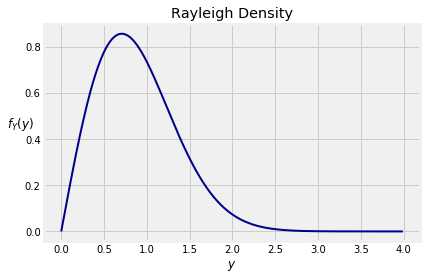

In [2]:
# NO CODE
y = np.arange(0, 4, 0.01)
weibull_dens = 2* y * np.exp((-1 * (y ** 2)))
plt.plot(y, weibull_dens, color='darkblue', lw=2)
plt.xlabel('$y$')
plt.ylabel('$f_Y(y)$', rotation = False)
plt.title('Rayleigh Density');

A log-normal density can be used as an approximation for the density of a product of a large number of i.i.d. random variables. The log of the product is the sum of a large number of i.i.d. variables, and hence is approximately normal by the Central Limit Theorem.

### Change of Variable Formula for Density: Monotone Function ###
Let $g$ be smooth and monotone (that is, either increasing or decreasing). The density of $Y = g(X)$ is given by

$$
f_Y(y) ~ = ~ f_X(x) \cdot \frac{1}{\lvert g'(x) \rvert} ~~~ \text{at } x = g^{-1}(y)
$$

We have proved the result for increasing $g$. When $g$ is decreasing, the proof is analogous to proof in the linear case and accounts for $g'$ being negative. We won't take the time to write it out.

### Reciprocal of a Uniform Variable ###
Let $U$ be uniform on $(0, 1)$ and let $V = 1/U$. The distribution of $V$ is called the *inverse uniform* but the word "inverse" is confusing in the context of change of variable. So we will simply call $V$ the reciprocal of $U$.

To find the density of $V$, start by noticing that the possible values of $V$ are in $(1, \infty)$ as the possible values of $U$ are in $(0, 1)$.

The components of the change of variable formula for densities:
- **The function:** Define $g(u) = 1/u$.
- **The derivative:** Then $g'(u) = -u^{-2}$.
- **The inverse function:** Let $v = g(u) = 1/u$. Then $u = g^{-1}(v) = 1/v$.
- **The known density:** $f_U(u) = 1$ for $0 < u < 1$.

By the formula, for $v > 1$ we have
$$
f_V(v) ~ = ~ f_U(u) \cdot \frac{1}{\lvert g'(u) \rvert} ~~~ \text{at } u = g^{-1}(v)
$$

That is, for $v > 1$,
$$
f_V(v) ~ = ~ 1 \cdot u^2 ~~~ \text{at } u = 1/v
$$
So 
$$
f_V(v) ~ = ~ \frac{1}{v^2}, ~~~ v > 1
$$

You should check that $f_V$ is indeed a density, that is, it integrates to 1. You should also check that the expectation of $V$ is infinite.

The density $f_V$ belongs to the *Pareto* family of densities, much used in economics.

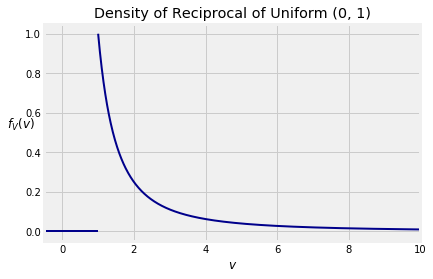

In [3]:
# NO CODE
v = np.arange(1, 10, 0.01)
y = 1/v**2
plt.plot(v, y, color='darkblue', lw=2)
plt.plot([-0.5, 1], [0, 0], color='darkblue', lw=2 )
plt.ylim(-0.05, 1.05)
plt.xlim(-0.5, 10)
plt.xlabel('$v$')
plt.ylabel('$f_V(v)$', rotation=0)
plt.title('Density of Reciprocal of Uniform (0, 1)');